In [107]:
import pandas as pd
import ast
from gensim.models import Word2Vec
import os
import tensorflow as tf
from tensorboard.plugins import projector

In [108]:
df = pd.read_csv('clean_avis_v1.csv')
del(df['Unnamed: 0'])
df['avis_tokenized'] = df['avis_tokenized'].apply(ast.literal_eval)

In [122]:
import gensim
from gensim.models import Word2Vec
from ast import literal_eval
import pandas as pd

model = Word2Vec(sentences=df['avis_tokenized'], vector_size=100, window=20, min_count=200, workers=4)

model.save("word2vec_model")

vector = model.wv['assurance']
print("Vector for 'assurance':", vector)


Vector for 'assurance': [-0.6750611   0.46020785  1.7363594   0.66726923 -1.3190924  -0.11420582
  0.8525899   0.46524584  1.1833531  -0.13958417  0.51028234 -1.0063908
 -0.25413004  0.96179605  0.32867488 -0.65587556  0.37308478 -0.08711211
 -0.8252098  -0.78645813  0.0376116   0.51127476  0.49441618  1.1954734
  0.86619806 -0.21459892 -0.14025746  0.15389606 -1.2331543  -0.56789464
 -1.7658932  -1.0618337   1.1998296  -1.7590941  -0.83849657 -0.85469204
  0.86951774  0.14760382 -0.52998775 -0.50057316 -1.5113894   0.8742824
 -1.3142403  -0.5079336  -0.9235376   0.35814512 -0.7886871   1.6996688
 -0.13076557  1.1410298  -0.7462554   0.36326972  0.19479671 -0.00234361
  1.255207    0.6432991   0.31987968 -0.57340986 -0.966688    0.7106918
 -0.624376   -0.6216191  -0.47951958 -0.08116192  0.30982968  0.78631526
  0.30032673  1.2176756  -0.66779804  0.65346086  0.9577643   1.3610032
  0.09553153 -0.8331095  -0.34903696  0.753576   -0.23900694  0.10503882
  0.33620018 -1.3402637  -0.79265

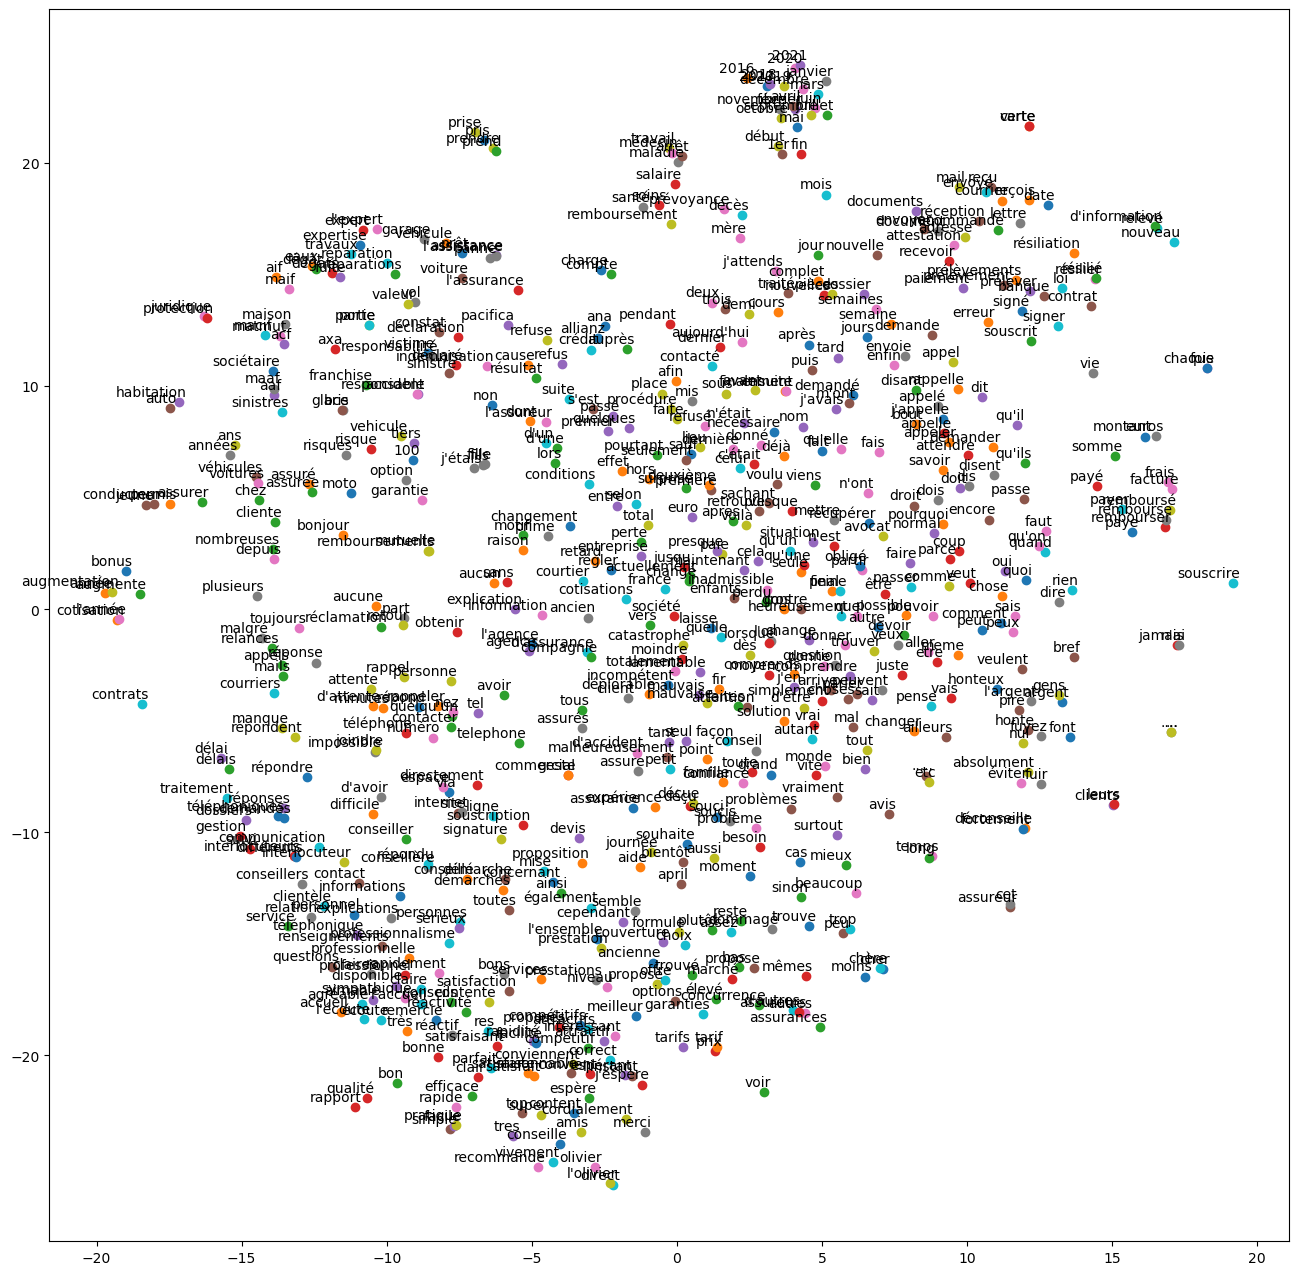

In [113]:
import matplotlib.pyplot as plt

model = Word2Vec(sentences=df['avis_tokenized'], vector_size=100, window=20, min_count=200, workers=4)

vocab = []
for i in range(0,len(model.wv)):
        vocab.append(model.wv.index_to_key[i])



def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
        #print(tokens)
        #print(labels)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)


    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

tsne_plot(model)


In [114]:
def cosine_similarity(word1,word2):
    
    return model.wv.similarity(word1,word2)

In [123]:
def most_similar_words(word, model, topn=5):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return f"The word '{word}' is not in the vocabulary."

similar_words_result = most_similar_words("example", model)

print("Most similar words:", similar_words_result)

Most similar words: The word 'example' is not in the vocabulary.


In [124]:
most_similar_words("assurance", model)

[('expérience', 0.5790565013885498),
 ('assure', 0.48691436648368835),
 ('chez', 0.46773603558540344),
 ('assurances', 0.45373639464378357),
 ('fortement', 0.4445490539073944)]

In [115]:
cosine_similarity('assurance','voiture')

0.34015974

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Convert the tokenized data back to string
df['avis_tokenized_str'] = df['avis_tokenized'].apply(lambda tokens: ' '.join(tokens))

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['avis_tokenized_str'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())



In [117]:
tfidf_df

,00,000,01,02,03,04,05,06,07,08,...,évitez,évité,évolution,évènement,évènements,événement,événements,êtes,être,œuvre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['avis_tokenized_str'], df['note'], test_size=0.2, random_state=42
)

# Create a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
classifier = MultinomialNB()

# Create a pipeline to combine TF-IDF and the classifier
model = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', classifier)
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

         1.0       0.55      0.96      0.70      1398
         2.0       0.51      0.03      0.06       754
         3.0       0.36      0.05      0.08       664
         4.0       0.45      0.45      0.45       951
         5.0       0.54      0.68      0.60       935

    accuracy                           0.52      4702
   macro avg       0.48      0.43      0.38      4702
weighted avg       0.49      0.52      0.44      4702



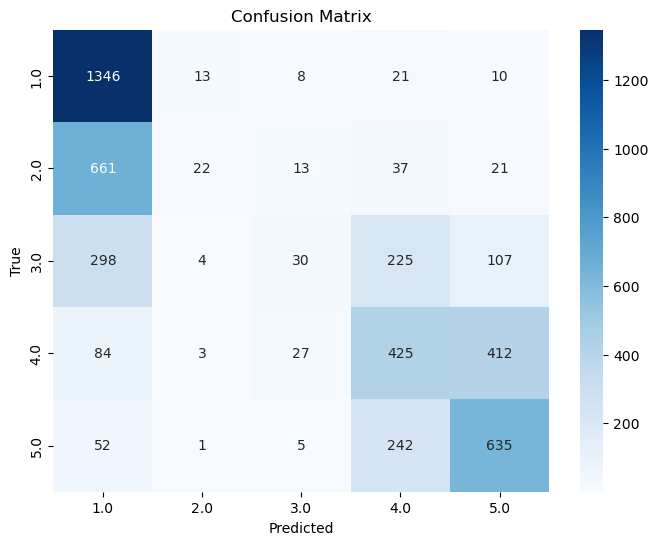

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['note'].unique()), yticklabels=sorted(df['note'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()